## SMOTE
Based on SMOTE : Synthetic Minority Over-sampling Technique by Nitesh V. Chawla et. al. https://arxiv.org/abs/1106.1813

Let $T$ be the minority class, $N$ be the % number of over-sampled data and $k$ be the number of nearest neighbour

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Data depicted as below, row is the number of instance and column is the number of attribute

In [2]:
T = np.random.randint(0, 100, size=(10,2))

for i, j in enumerate(T):
    print("instance in index of-{} : {}".format(i, T[i, :]))

instance in index of-0 : [47 13]
instance in index of-1 : [90  2]
instance in index of-2 : [34  7]
instance in index of-3 : [34 99]
instance in index of-4 : [58 39]
instance in index of-5 : [85 30]
instance in index of-6 : [49 48]
instance in index of-7 : [21 67]
instance in index of-8 : [35 81]
instance in index of-9 : [77  5]


We want to increase/over-sampling our data by 200% or 2 times, thus $N$ = 2

In [3]:
N = 2

First step, find the $k$-nearest neighbour for each instances in $T$. Set the default value for $k=3$. I only use euclidean equation to find distance among instaces. 
Afterward, the indices of all $k$-nearest neighbour will stored in array.

In [4]:
k = 3

In [5]:
# distance function between two points
def euclidian_distance(a, b):
    return np.sqrt(np.sum((a-b)**2, axis=0))

# function find the indices of k-nearest neighbour for one instance
def kNN(instance, data, k=3):    
    
    # number of instance in data
    n = data.shape[0]
    # variable for storing result
    temp = np.zeros(n)
    # calculate distance on instance and data
    for i in range(n):
        temp[i] = euclidian_distance(instance, data[i, :])
    
    # sort the distance and return the indices of the k-nearest neighbour
    return np.argsort(temp)[:k] 

In [6]:
# function to find the instance based on the indices which returned from kNN()
def populateNArray(data, k=3):
    
    # number of instance
    n = data.shape[0]
    # variable for storing result. row is the number of data, columns is the number of k-nearest neighbour
    temp = np.zeros(shape=(n, k))
    # find all the k-nearest neighbour in data
    for i in range(n):
        temp[i, :] = np.array(kNN(data[i, :], data, k))
        
    # return the indices of the k-nearest neighbour in all data
    return temp.astype(int)

Find the $k$-nearest neighbour for every instance in $T$

In [7]:
n_neighbours = populateNArray(T)

for i, j in enumerate(n_neighbours):
    print("{}-nearest neighbours of instance in index of-{} are :{}".format(k, i, n_neighbours[i, :]))

3-nearest neighbours of instance in index of-0 are :[0 2 4]
3-nearest neighbours of instance in index of-1 are :[1 9 5]
3-nearest neighbours of instance in index of-2 are :[2 0 4]
3-nearest neighbours of instance in index of-3 are :[3 8 7]
3-nearest neighbours of instance in index of-4 are :[4 6 0]
3-nearest neighbours of instance in index of-5 are :[5 9 1]
3-nearest neighbours of instance in index of-6 are :[6 4 7]
3-nearest neighbours of instance in index of-7 are :[7 8 6]
3-nearest neighbours of instance in index of-8 are :[8 3 7]
3-nearest neighbours of instance in index of-9 are :[9 1 5]


Based on the indices of $k$-nearest neighbour and let $t_i$ be the $i$-th instance of $T$, we calculate the synthetic data of $T$ as follows :

$$
((t_i \, attribute - nearestNeighbour \, attribute) * random(0, 1)) + t_i \, attribute
$$

In [8]:
def SMOTE(data, N, k=3):
    
    # find the shape of data
    n, m = data.shape
    # create zero array for storing synthetic data
    # the number of instance in synthetic data is defined n*N
    temp = np.zeros(shape=(n*N, m))
    # find the indices of the k-nearest neighbour in all data
    nnArray = populateNArray(data, k)
    
    # increment variable
    l = 0
    # loop in all data
    for i in range(n):
        # loop the number of times synthetic instance will be created
        for j in range(N):
            # calculate new synthetic instance
            temp[l, :] = data[i, :] + ((data[nnArray[i,N], :] - data[i, :]) * np.random.uniform(0, 1))
            l += 1      
            
    # return smoted data
    return temp

In [9]:
x_smoted = SMOTE(T, N)
x_smoted

array([[54.52265831, 30.78082873],
       [51.10334527, 22.69881609],
       [87.63554505, 15.2409477 ],
       [87.12447636, 18.10293237],
       [52.94620397, 32.2616053 ],
       [41.44595742, 16.92794322],
       [25.51697704, 78.11871272],
       [31.55394351, 92.97893786],
       [48.01542186, 15.40008802],
       [48.76554904, 17.1731159 ],
       [86.0703826 , 24.00585747],
       [89.40027163,  5.35847887],
       [34.30897215, 57.96891175],
       [38.8266233 , 54.90336276],
       [27.87356057, 62.33579819],
       [27.39284697, 62.6619967 ],
       [23.752128  , 69.752128  ],
       [24.37513087, 70.37513087],
       [80.61383105, 16.29322204],
       [77.37108165,  6.15963016]])

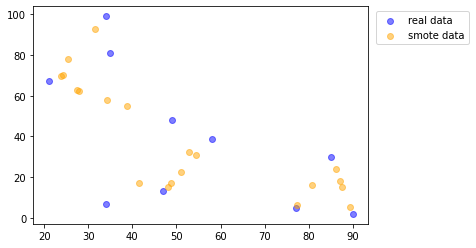

In [10]:
plt.scatter(T[:,0], T[:,1], color='blue', label="real data", alpha=0.5)
plt.scatter(x_smoted[:,0], x_smoted[:,1], color='orange', label="smote data", alpha=0.5)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.show()

note :
- this implementation not covered for N < 100%
